# GOWDY PHENOMENOLOGY IN SCALE-INVARIANT VARIABLES by Andersson Van Elst Uggla
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 15, 2022

https://arxiv.org/abs/gr-qc/0310127

In [47]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [48]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [49]:
t,x,y1,y2,dt,dx,dy1,dy2 = symbols('t x y1 y2 dt dx dy1 dy2')

In [50]:
P = Function('P')(t,x)
P

In [51]:
Q = Function('Q')(t,x)
Q

In [52]:
Lambda = Function('lambda')(t,x)
Lambda

In [53]:
variables = Matrix([t,x,y1,y2])
variables

⎡t ⎤
⎢  ⎥
⎢x ⎥
⎢  ⎥
⎢y₁⎥
⎢  ⎥
⎣y₂⎦

In [54]:
differentials = Matrix([dt,dx,dy1,dy2])
differentials 

⎡dt ⎤
⎢   ⎥
⎢dx ⎥
⎢   ⎥
⎢dy₁⎥
⎢   ⎥
⎣dy₂⎦

In [55]:
lineElement = expand( exp((t-Lambda)/2) * (-exp(-2*t)*dt**2 + dx**2) + exp(-t) * ( exp(P) * (dy1 + Q * dy2 )**2 + exp(-P)*dy2**2) ) 
lineElement

In [56]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  -3⋅t   -λ(t, x)                                                                          
⎢  ─────  ─────────                                                                         
⎢    2        2                                                                             
⎢-ℯ     ⋅ℯ                 0                 0                              0               
⎢                                                                                           
⎢                     t  -λ(t, x)                                                           
⎢                     ─  ─────────                                                          
⎢                     2      2                                                              
⎢        0           ℯ ⋅ℯ                    0                              0               
⎢                                                                                           
⎢                                        -t  P(t, x)                  

In [57]:
import sympy

In [58]:
m = sympy.Array(g)
m

⎡  -3⋅t   -λ(t, x)                                                                          
⎢  ─────  ─────────                                                                         
⎢    2        2                                                                             
⎢-ℯ     ⋅ℯ                 0                 0                              0               
⎢                                                                                           
⎢                     t  -λ(t, x)                                                           
⎢                     ─  ─────────                                                          
⎢                     2      2                                                              
⎢        0           ℯ ⋅ℯ                    0                              0               
⎢                                                                                           
⎢                                        -t  P(t, x)                  

In [59]:
from einsteinpy.symbolic import *

In [60]:
syms = sympy.symbols("t x y1 y2")
t,x,y1,y2 = syms

In [61]:
metric = MetricTensor(m,syms)

In [62]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡  ∂                     ∂                                                                 
⎢⎢  ──(λ(t, x))          -──(λ(t, x))                                                       
⎢⎢  ∂t            3       ∂x                                                                
⎢⎢- ─────────── - ─      ─────────────                                        0             
⎢⎢       4        4            4                                                            
⎢⎢                                                                                          
⎢⎢   ∂               ⎛    ∂          ⎞  2⋅t                                                 
⎢⎢  -──(λ(t, x))     ⎜1 - ──(λ(t, x))⎟⋅ℯ                                                    
⎢⎢   ∂x              ⎝    ∂t         ⎠                                                      
⎢⎢  ─────────────    ──────────────────────                                   0             
⎢⎢        4                    4                                      

In [63]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅t  ∂       
⎢   2⋅P(t, x) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(t, x))   ℯ    ⋅───(λ(t, 
⎢  ℯ         ⋅⎜──(Q(t, x))⎟    ⎜──(P(t, x))⎟    ──(λ(t, x))     2                    2      
⎢             ⎝∂t         ⎠    ⎝∂t         ⎠    ∂t            ∂t                   ∂x       
⎢- ───────────────────────── - ────────────── + ─────────── + ──────────── - ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(t, x) ∂           ∂             ∂           ∂        

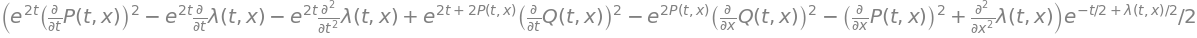

In [64]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [65]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢     ⎛                  2                             2                                    
⎢     ⎜ 2⋅t ⎛∂          ⎞     2⋅t ∂              2⋅t  ∂              2⋅t + 2⋅P(t, x) ⎛∂     
⎢0.25⋅⎜ℯ   ⋅⎜──(P(t, x))⎟  - ℯ   ⋅──(λ(t, x)) - ℯ   ⋅───(λ(t, x)) + ℯ               ⋅⎜──(Q(t
⎢     ⎜     ⎝∂t         ⎠         ∂t                   2                             ⎝∂t    
⎢     ⎝                                              ∂t                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [66]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [67]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [68]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified 

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅t  ∂       
⎢   2⋅P(t, x) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(t, x))   ℯ    ⋅───(λ(t, 
⎢  ℯ         ⋅⎜──(Q(t, x))⎟    ⎜──(P(t, x))⎟    ──(λ(t, x))     2                    2      
⎢             ⎝∂t         ⎠    ⎝∂t         ⎠    ∂t            ∂t                   ∂x       
⎢- ───────────────────────── - ────────────── + ─────────── + ──────────── - ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(t, x) ∂           ∂             ∂           ∂        

In [69]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                      2                                2                   
⎢        -2⋅t + 2⋅P(t, x) ⎛∂          ⎞          2⋅P(t, x) ⎛∂          ⎞         ⎛∂         
⎢- 0.25⋅ℯ                ⋅⎜──(Q(t, x))⎟  - 0.25⋅ℯ         ⋅⎜──(Q(t, x))⎟  - 0.25⋅⎜──(P(t, x)
⎢                         ⎝∂x         ⎠                    ⎝∂t         ⎠         ⎝∂t        
⎢                                                                                           
⎢                                                                                           
⎢                                   2⋅P(t, x) ∂           ∂             ∂           ∂       
⎢                                  ℯ         ⋅──(Q(t, x))⋅──(Q(t, x))   ──(P(t, x))⋅──(P(t, 
⎢                                             ∂t          ∂x            ∂t          ∂x      
⎢                                - ────────────────────────────────── 

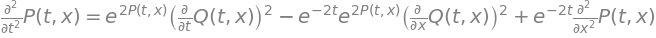

In [70]:
equation2pt2a = Eq(diff(P,t,t), expand(solve( Ric.tensor()[2,2].args[1], diff(P,t,t) )[0] ))
equation2pt2a

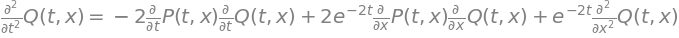

In [71]:
equation2pt2b = Eq(diff(Q,t,t), expand(solve( Ric.tensor()[2,3].args[1].subs(equation2pt2a.lhs,equation2pt2a.rhs) , diff(Q,t,t) )[0] ))
equation2pt2b

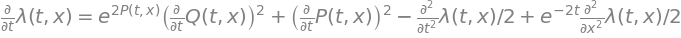

In [72]:
equation2pt3a = Eq( diff(Lambda,t), solve( Ric.tensor()[0,0], diff(Lambda,t) )[0] )
equation2pt3a

In [73]:
equation2pt3b = Eq( diff(Lambda,x) ,solve( Ric.tensor()[1,0], diff(Lambda,x) )[0] ) 
equation2pt3b

In [75]:
vacuumFieldEquations = Matrix([equation2pt2a,equation2pt2b,equation2pt3a,equation2pt3b])
vacuumFieldEquations

⎡   2                                    2                                 2           2    
⎢  ∂              2⋅P(t, x) ⎛∂          ⎞     -2⋅t  2⋅P(t, x) ⎛∂          ⎞     -2⋅t  ∂     
⎢ ───(P(t, x)) = ℯ         ⋅⎜──(Q(t, x))⎟  - ℯ    ⋅ℯ         ⋅⎜──(Q(t, x))⎟  + ℯ    ⋅───(P(t
⎢   2                       ⎝∂t         ⎠                     ⎝∂x         ⎠            2    
⎢ ∂t                                                                                 ∂x     
⎢                                                                                           
⎢  2                                                                                    2   
⎢ ∂                 ∂           ∂                -2⋅t ∂           ∂              -2⋅t  ∂    
⎢───(Q(t, x)) = - 2⋅──(P(t, x))⋅──(Q(t, x)) + 2⋅ℯ    ⋅──(P(t, x))⋅──(Q(t, x)) + ℯ    ⋅───(Q(
⎢  2                ∂t          ∂t                    ∂x          ∂x                    2   
⎢∂t                                                                   